In [ ]:
!pip install py_vollib
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.5/135.5 KB 7.8 MB/s eta 0:00:00
  Created wheel for py_vollib: filename=py_vollib-1.0.1-py3-none-any.whl size=62855 sha256=688cdc03c6ae586da19fdd9f0be76ede03fea5d68b27af0350def87b436ffa82
  Stored in directory: /root/.cache/pip/wheels/38/8d/d9/a680031767bd6a3d734fc7c48a75767591795e47ac66ca143c
  Created wheel for py_lets_be_rational: filename=py_lets_be_rational-1.0.1-py3-none-any.whl size=24470 sha256=47c8e3c50dd8e629387af10e8a2ea85be13ed85c0ffa349c1dea2158c94b4b73
  Stored in directory: /root/.cache/pip/wheels/e6/67/1e/93e41aebf34e4fd3cb02a865e9c782c9edaac5051f15a01d2e
Successfully built py_vollib py_lets_be_rational
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

# to fetch data 
import yfinance as yf

import scipy.stats as ss

import py_vollib.black_scholes.greeks.analytical as derivatives

import math

In [ ]:
df_fut = pd.read_csv('file3.csv')
df_fut.head()

,Symbol,Date,Expiry,Option Type,Strike Price,Open,High,Low,Close,LTP,Settle Price,No. of contracts,Turnover in Lacs,Premium Turnover in Lacs,Open Int,Change in OI,Underlying Value
0,BANKNIFTY,28-May-2021,24-Jun-2021,CE,35000,1394.65,1459.5,1132.0,1213.55,1224.50,1213.55,18138,164479.84,5772.34,283425,39000,35141.45
1,BANKNIFTY,31-May-2021,24-Jun-2021,CE,35000,1197.95,1339.0,1021.6,1308.30,1281.95,1308.30,14456,130864.56,4374.56,245275,-38150,-
2,BANKNIFTY,01-Jun-2021,24-Jun-2021,CE,35000,1291.90,1398.0,1112.3,1155.05,1163.00,1155.05,15231,137967.95,4696.70,345025,99750,-
3,BANKNIFTY,02-Jun-2021,24-Jun-2021,CE,35000,1099.30,1145.7,982.5,1128.05,1122.00,1128.05,12258,110507.46,3249.96,342375,-2650,-
4,BANKNIFTY,03-Jun-2021,24-Jun-2021,CE,35000,1163.20,1342.5,1111.7,1265.45,1270.00,1265.45,7511,68025.76,2304.51,307825,-34550,-


In [ ]:
df_call_36000 = pd.read_csv ('OPTIDX_BANKNIFTY_CE_28-May-2021_TO_24-Jun-2021_1.csv')
df_call_36000.head()

FileNotFoundError: ignored

In [ ]:
symbol = '^NSEBANK'
end = '2021-06-25'
start = '2021-05-28'


# Read data 
df = yf.download(symbol,start,end)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-05-28,35345.648438,35436.648438,34977.199219,35141.449219,35141.449219,0
2021-05-31,35097.449219,35584.300781,34930.101562,35526.648438,35526.648438,0
2021-06-01,35639.750000,35713.898438,35241.199219,35337.199219,35337.199219,0
2021-06-02,35271.601562,35415.851562,35070.300781,35373.750000,35373.750000,0
2021-06-03,35536.449219,35723.699219,35413.000000,35649.000000,35649.000000,0


In [ ]:
symbol = '^NSEBANK'
end = '2021-05-28'
start = '2020-05-28'


# Read data 
#You need to read the from the files provided on NSE Bank for the time given above.

In [ ]:
ret = df['Close'].pct_change()[1:]

In [ ]:
ret.head()

Date
2021-05-31    0.010961
2021-06-01   -0.005333
2021-06-02    0.001034
2021-06-03    0.007781
2021-06-04   -0.010024
Name: Close, dtype: float64

In [ ]:
daily_vol = ret.std()
daily_vol

0.007534349442956498

In [ ]:
#calculate the Annual Volatility using the daily volatility given above.
import math 
annual_vol= daily_vol* math.sqrt (252)
annual_vol

0.11960408950032554

In [ ]:
expiry = datetime.strptime('2021-06-24', '%Y-%m-%d') 
expiry  #Expiry date

datetime.datetime(2021, 6, 24, 0, 0)

In [ ]:

time = expiry-df.index    #Time left in days
time

TimedeltaIndex(['27 days', '24 days', '23 days', '22 days', '21 days',
                '20 days', '17 days', '16 days', '15 days', '14 days',
                '13 days', '10 days',  '9 days',  '8 days',  '7 days',
                 '6 days',  '3 days',  '2 days',  '1 days',  '0 days'],
               dtype='timedelta64[ns]', name='Date', freq=None)

In [ ]:
#Convert Time left in days to int data type
j = time/pd.Timedelta(days=1)
j

p = [int(x) for x in j]
p

[27, 24, 23, 22, 21, 20, 17, 16, 15, 14, 13, 10, 9, 8, 7, 6, 3, 2, 1, 0]

In [ ]:
no_of_lots_fut = 10           #number of future lots we bought at start of the month
buy_avg_future = df_fut['Open'][0]       #buying average of that lot
lot_size = 25     #lot size of bank nifty
delta = 1*no_of_lots_fut*lot_size    #taking delta of future is 1 as if banknifty changes by 1 the future would also change by 1
delta_to_maintain = 0.8 #Maintain 0.8 delta per future contract

In [ ]:

flag = 'c'   #for call or put option
S = df['Open'][0]    #price of the underlying
K = 36000   #strike price
t = time[0]/365   #time left to expiry in years
sigma = annual_vol   #volatility
r = 0.06  #risk free rate
delta_per_lot_call = delta  #Calculate delta per lot
delta_per_lot_call

250

In [ ]:

delta_to_maintain

0.8

In [ ]:

delta

250

In [ ]:
number_of_lots_call = ((delta) -(delta_to_maintain*delta))/ lot_size #Calculate Number of call lots we have to sell to ke

In [ ]:

number_of_lots_call

2.0

In [ ]:

sell_avg_call = df_call_36000['Open'][0]  #selling avg of call 
sell_avg_call

1394.65

In [ ]:
# Before moving on to managing delta, answer a few questions:

#Q1 : What do you think would happen to the delta of call option as banknifty goes up? (increase/decrease) 
#Ans : At ATM delta will increase 


#Q2 : So to manage the delta what would be done to call options already sold? (Buy some call options / Sell more) 
#Hint : Remember selling call options would give negative delta
#Ans : Buy some call options 

In [ ]:
# number_of_lots_call = math.ceil((delta-delta_to_maintain)/delta_per_lot_call)  #number of call lots we have to sell to keep delta of 200
sell_avg_call = df_call_36000['Open'][0]  #selling avg of call 
sell_avg_call
profit= []

for i in range(len(df)-1):
    delta_per_lot_call = df_call_36000['Open']-df_call_36000['Close']/df['Close']-df['Open']  #Calculate delta per lot at the next closing day
    current_number_of_lots_call = no_of_lots_fut-number_of_lots_call  #number of lots required to sell
    no_of_lots_added = number_of_lots_call  #number of lots added/subtracted for selling
    sell_avg_call = df_call_36000['Settle Price'][i] #new selling avg of call
    number_of_lots_call = number_of_lots_call  #update number of lots of calls sold
    profit.append((df_fut['Close'][i]-buy_avg_future)*no_of_lots_fut*lot_size + (sell_avg_call-df_call_36000['Close'][i])*lot_size*number_of_lots_call)  #unrealised profit 
   
   
   
    #print(df_fut['Close'][i], buy_avg_future, sell_avg_call, df_call_36000['Close'][i])
#As you can see that the number of lots of call sold is way too many as the delta of out of money call option appr

NameError: ignored

In [ ]:
#As you can see that the number of lots of call sold is way too many as the delta of out of money call option approches 0 in the end
#Thus this strategy would practically be possible by changing the strike price of the call option as it goes deep out of money
#But that would require much higher level programming thats why we have given this simple assignment jst theoretically make
#you realise the power of hedging

number_of_lots_call

1

In [ ]:

sell_avg_call

46.8

In [ ]:

delta_per_lot_call

2021-05-28 00:00:00   NaN
2021-05-31 00:00:00   NaN
2021-06-01 00:00:00   NaN
2021-06-02 00:00:00   NaN
2021-06-03 00:00:00   NaN
2021-06-04 00:00:00   NaN
2021-06-07 00:00:00   NaN
2021-06-08 00:00:00   NaN
2021-06-09 00:00:00   NaN
2021-06-10 00:00:00   NaN
2021-06-11 00:00:00   NaN
2021-06-14 00:00:00   NaN
2021-06-15 00:00:00   NaN
2021-06-16 00:00:00   NaN
2021-06-17 00:00:00   NaN
2021-06-18 00:00:00   NaN
2021-06-21 00:00:00   NaN
2021-06-22 00:00:00   NaN
2021-06-23 00:00:00   NaN
2021-06-24 00:00:00   NaN
0                     NaN
1                     NaN
2                     NaN
3                     NaN
4                     NaN
5                     NaN
6                     NaN
7                     NaN
8                     NaN
9                     NaN
10                    NaN
11                    NaN
12                    NaN
13                    NaN
14                    NaN
15                    NaN
16                    NaN
17                    NaN
18          

In [ ]:
profit

[-45275.00000000004,
 -21587.500000000033,
 -59900.00000000004,
 -66650.00000000003,
 -32300.00000000001,
 -85850.00000000003,
 -79400.00000000003,
 -149750.00000000003,
 -198037.50000000003,
 -159837.50000000006,
 -184662.50000000003,
 -213375.00000000006,
 -184187.50000000003,
 -218837.50000000006,
 -282512.50000000006,
 -303800.0,
 -287712.50000000006,
 -310750.0,
 -336962.50000000006]

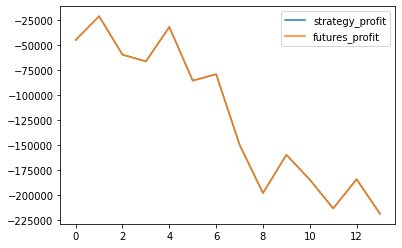

In [ ]:
plt.plot(profit[:14], label = 'strategy_profit')
plt.plot((df_fut['Close']-df_fut['Open'][0])[:14]*250, label = 'futures_profit')
plt.legend()
